<a href="https://colab.research.google.com/github/Sareh89Ahd/Sareh.Ahmadinasab/blob/main/Sareh_6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install imbalanced-learn==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0 requires imbalanced-learn>=0.8.1, but you have imbalanced-learn 0.7.0 which is incompatible.


In [19]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0


In [20]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [24]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Sareh89Ahd/Sareh.Ahmadinasab/main/Birds-Info.csv')
df.head(25)

huml   humw   ulnal  ulnaw   feml  femw type
0    80.78   6.68   72.01   4.88  41.81  3.70   SW
1    88.91   6.63   80.53   5.59  47.04  4.30   SW
2    79.97   6.37   69.26   5.28  43.07  3.90   SW
3    77.65   5.70   65.76   4.77  40.04  3.52   SW
4    62.80   4.84   52.09   3.73  33.95  2.72   SW
5    61.92   4.78   50.46   3.47  49.52  4.41   SW
6    79.73   5.94   67.39   4.50  42.07  3.41   SW
7    86.98   5.68   74.52   4.55  44.46  3.78   SW
8   118.20   7.82  116.64   6.13  59.33  5.45   SW
9   145.00  10.42  144.00   7.05  70.96  7.44   SW
10  165.00  11.45  156.00   8.68  80.25  7.85   SW
11  186.00   9.83  152.00   8.76  56.02  7.02   SW
12  172.00   8.44  142.00   8.43  52.18  6.68   SW
13  148.91   6.78  121.35   6.50  44.29  6.33   SW
14  149.19   6.98  121.48   6.21  43.33  5.39   SW
15  140.59   6.59  115.97   5.81  39.75  5.61   SW
16  135.23   6.22  108.78   5.83  37.99  5.13   SW
17  124.53   6.01  100.37   5.82  34.54  5.43   SW
18  127.03   6.18  102.53   5.64  36.52  4.89   SW
19  106.02   4.47   95.79   4.33  41.96  4.80   SW
20  113.84   4.80  100.71   4.39  43.95  5.08   SW
21  108.62   5.04   97.70   4.66  45.08  5.78   SW
22  110.33   5.86   97.10   4.60  43.82  5.73   SW
23   63.62   3.42   59.00   2.75  30.16  2.92   SW
24   70.73   3.69   65.19   2.93  32.52  3.54   SW

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    413 non-null    float64
 1   humw    413 non-null    float64
 2   ulnal   413 non-null    float64
 3   ulnaw   413 non-null    float64
 4   feml    413 non-null    float64
 5   femw    413 non-null    float64
 6   type    413 non-null    object 
dtypes: float64(6), object(1)
memory usage: 22.7+ KB


In [26]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [27]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

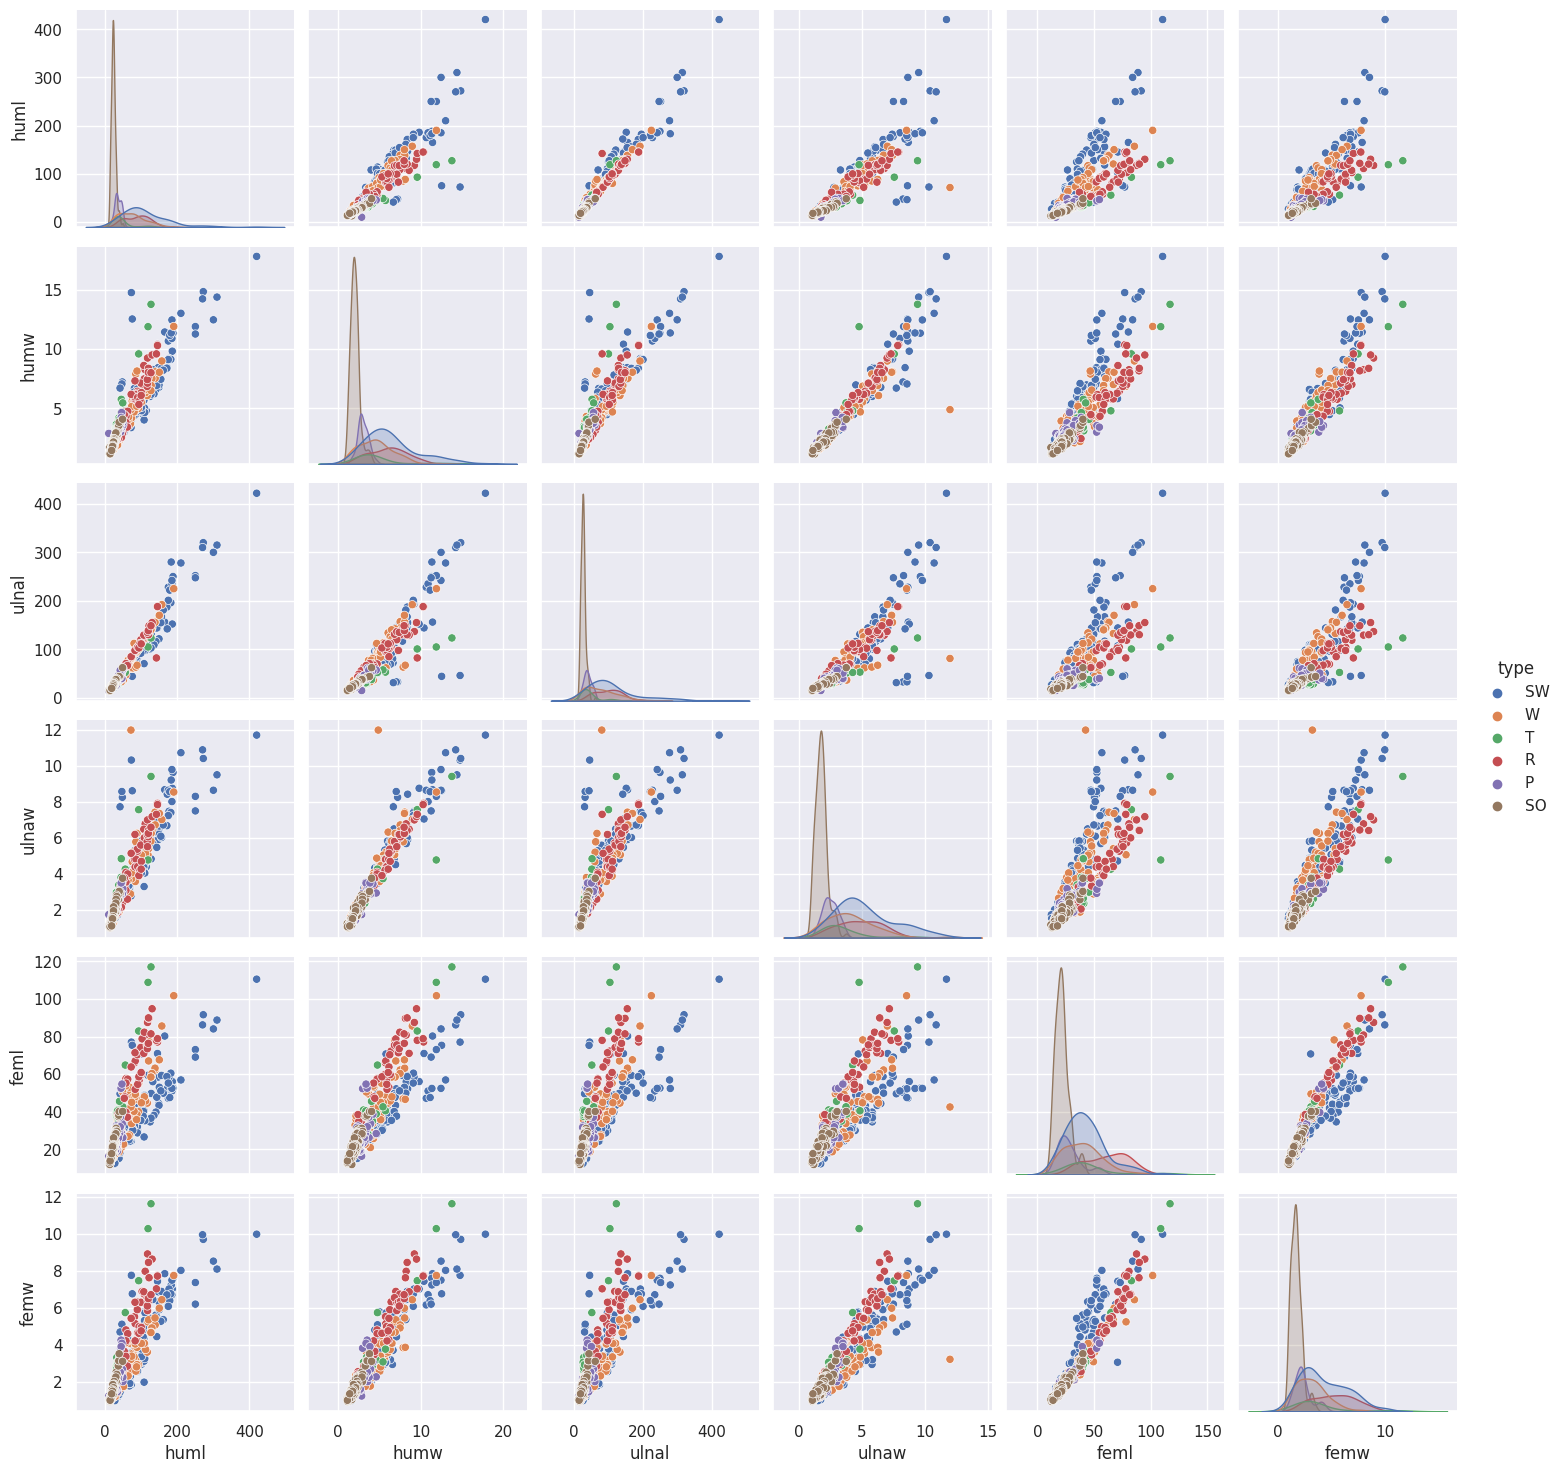

In [28]:
sns.pairplot(df, hue='type')
plt.show()

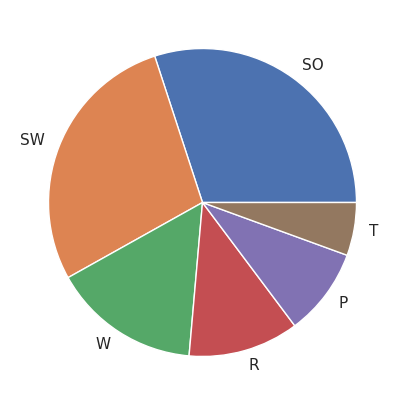

In [29]:
y =df['type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

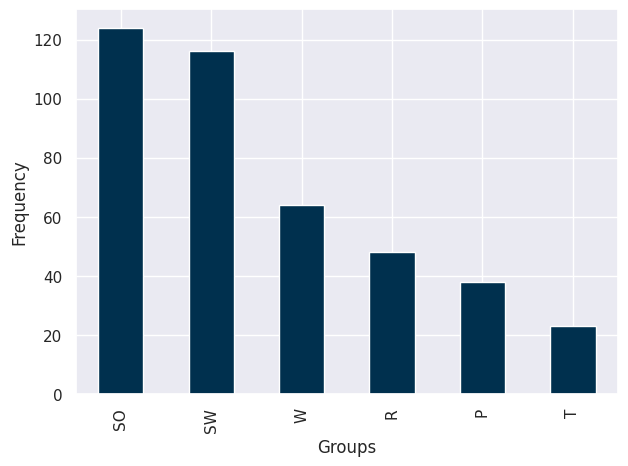

In [30]:
y =df['type']
y.value_counts().plot(kind='bar', color='#00304e')
plt.ylabel('Frequency')
plt.xlabel("Groups")
plt.show()

In [31]:
X = df.drop(columns=['type'])
X.head(10)

huml   humw   ulnal  ulnaw   feml  femw
0   80.78   6.68   72.01   4.88  41.81  3.70
1   88.91   6.63   80.53   5.59  47.04  4.30
2   79.97   6.37   69.26   5.28  43.07  3.90
3   77.65   5.70   65.76   4.77  40.04  3.52
4   62.80   4.84   52.09   3.73  33.95  2.72
5   61.92   4.78   50.46   3.47  49.52  4.41
6   79.73   5.94   67.39   4.50  42.07  3.41
7   86.98   5.68   74.52   4.55  44.46  3.78
8  118.20   7.82  116.64   6.13  59.33  5.45
9  145.00  10.42  144.00   7.05  70.96  7.44

In [32]:
X.describe().transpose()

count       mean        std    min    25%    50%    75%     max
huml   413.0  64.874867  54.056078   9.85  25.36  44.18  90.49  420.00
humw   413.0   4.381235   2.861460   1.14   2.20   3.50   5.82   17.84
ulnal  413.0  69.197409  58.929490  14.09  28.16  43.71  97.52  422.00
ulnaw  413.0   3.606538   2.190150   1.00   1.87   2.96   4.77   12.00
feml   413.0  36.822446  19.899356  11.83  21.35  31.09  47.09  117.07
femw   413.0   3.221768   2.021169   0.93   1.72   2.52   4.11   11.64

**Standardize the Data**

In [33]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

huml      humw     ulnal     ulnaw      feml      femw
0  0.294591  0.804328  0.047786  0.582155  0.250943  0.236899
1  0.445173  0.786834  0.192541  0.906727  0.514084  0.534117
2  0.279588  0.695861  0.001063  0.765012  0.314338  0.335971
3  0.236618  0.461430 -0.058402  0.531869  0.161887  0.147733
4 -0.038430  0.160520 -0.290655  0.056440 -0.144524 -0.248557
5 -0.054729  0.139526 -0.318349 -0.062417  0.638863  0.588607
6  0.275143  0.545405 -0.030708  0.408441  0.264025  0.093243
7  0.409426  0.454432  0.090431  0.431298  0.384275  0.276528
8  0.987674  1.203210  0.806050  1.153584  1.132441  1.103784
9  1.484057  2.112939  1.270897  1.574156  1.717591  2.089557

In [34]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
huml   413.0 -2.064531e-16  1.001213 -1.019157 -0.731884 -0.383305  0.474437   
humw   413.0  2.064531e-16  1.001213 -1.134095 -0.763205 -0.308340  0.503418   
ulnal  413.0 -2.064531e-16  1.001213 -0.936276 -0.697226 -0.433031  0.481201   
ulnaw  413.0  6.881770e-17  1.001213 -1.191562 -0.793847 -0.295560  0.531869   
feml   413.0  6.881770e-17  1.001213 -1.257466 -0.778478 -0.288421  0.516600   
femw   413.0  1.032265e-16  1.001213 -1.135257 -0.743920 -0.347630  0.439998   

            max  
huml   6.577537  
humw   4.709166  
ulnal  5.994121  
ulnaw  3.837016  
feml   4.037562  
femw   4.170082

**Observations and variables**

In [35]:
observations = list(df.index)
variables = list(df.columns)

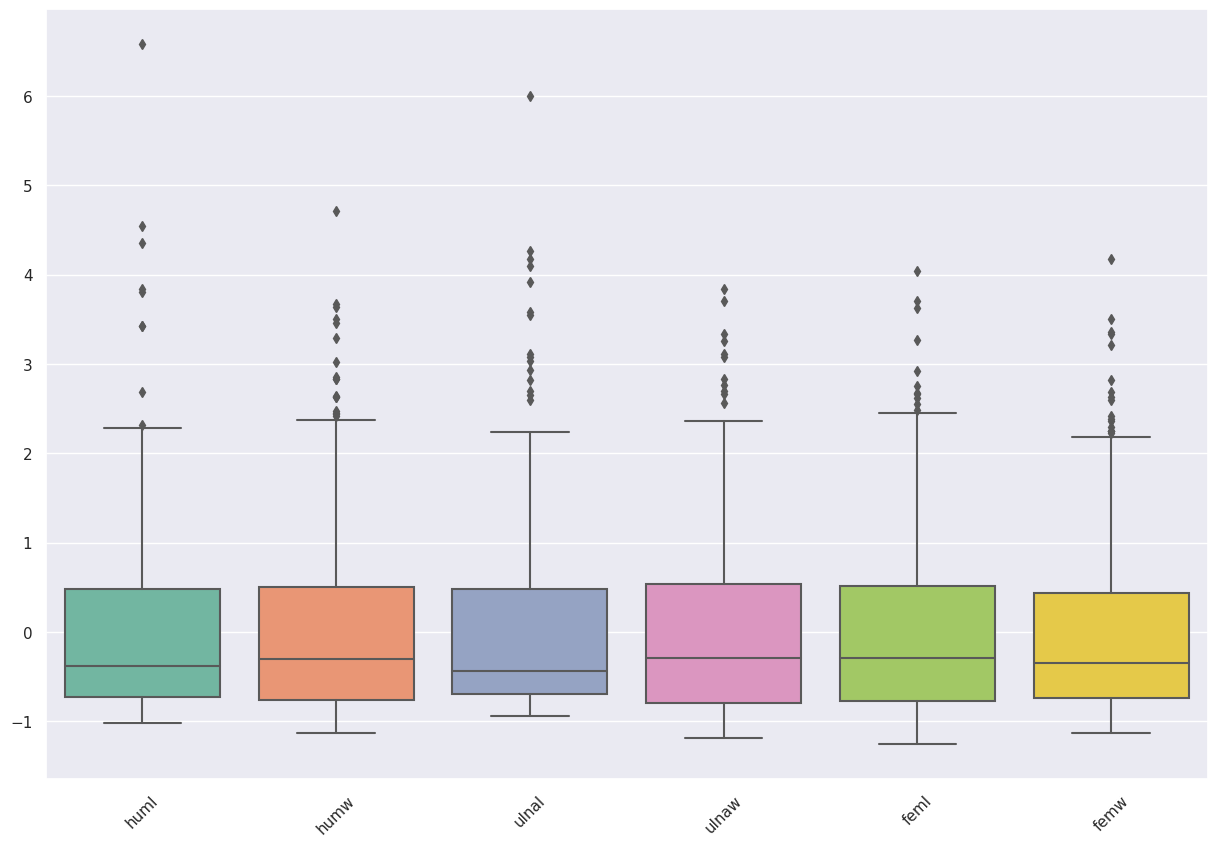

In [36]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

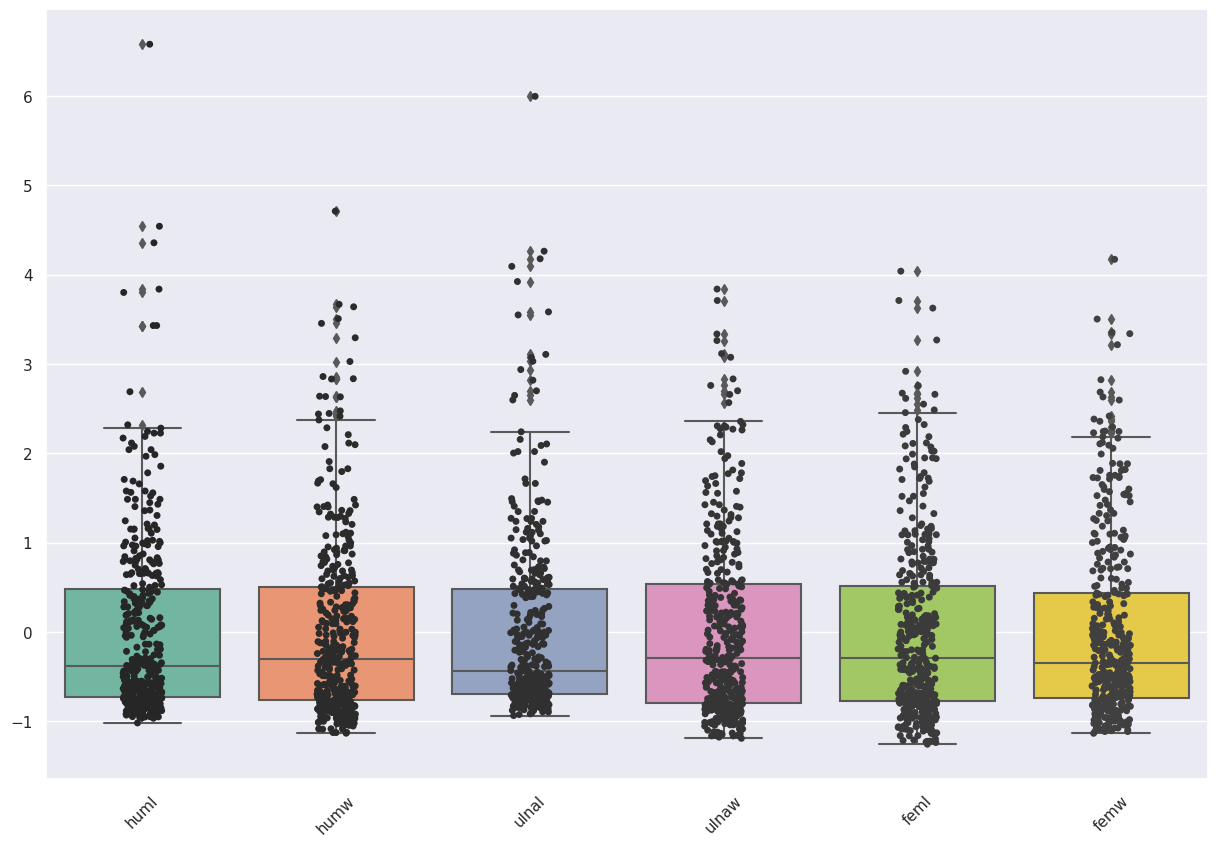

In [37]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

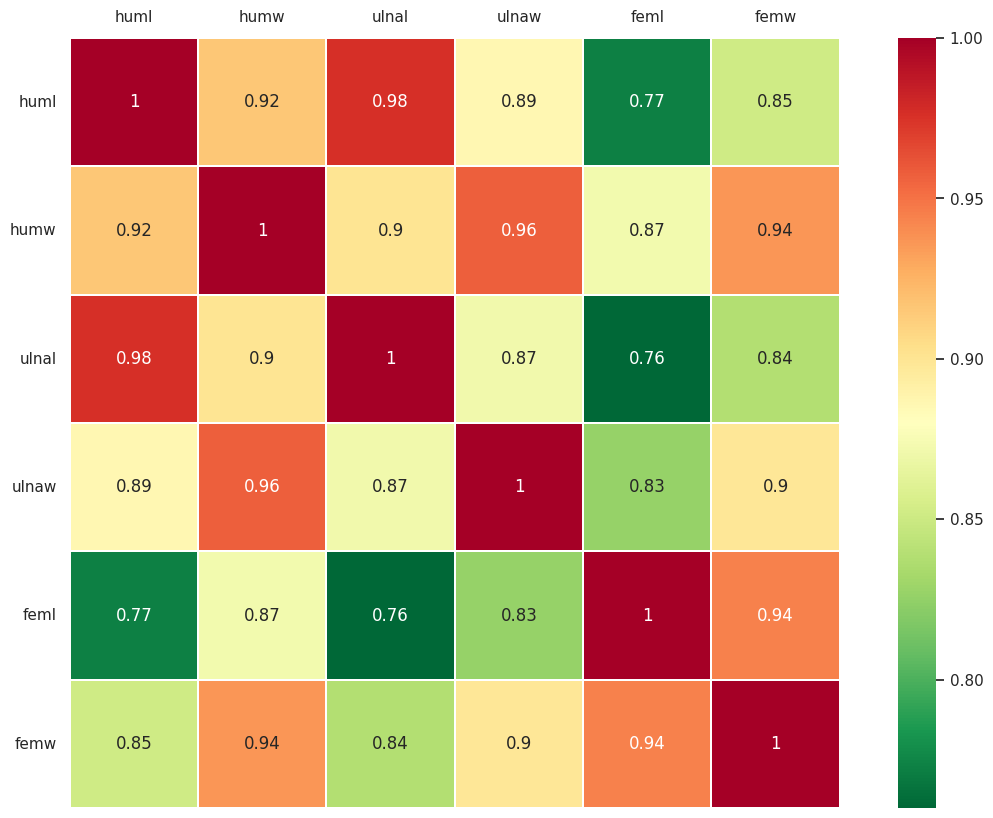

In [38]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), vmax=1, cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=True, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

In [39]:
eigen_values, eigen_vectors = np.linalg.eig(X.corr())
print(eigen_vectors)
print(eigen_values)

[[ 0.40836626  0.46005248 -0.26798864 -0.73414513  0.10165527 -0.02163181]
 [ 0.42194129 -0.00821     0.32808876  0.20845518  0.77119918  0.2757792 ]
 [ 0.40397641  0.49812    -0.35647068  0.64134647 -0.20464578 -0.0916678 ]
 [ 0.41113675  0.03791395  0.73307053 -0.05786172 -0.38769279 -0.37213307]
 [ 0.3903953  -0.63085274 -0.38536093 -0.00317118  0.13470908 -0.53193673]
 [ 0.41299357 -0.37516413 -0.08702331 -0.05379624 -0.42963461  0.70259177]]
[5.4055206  0.35924937 0.1400567  0.02250079 0.03089697 0.04177556]


<Figure size 700x500 with 0 Axes>

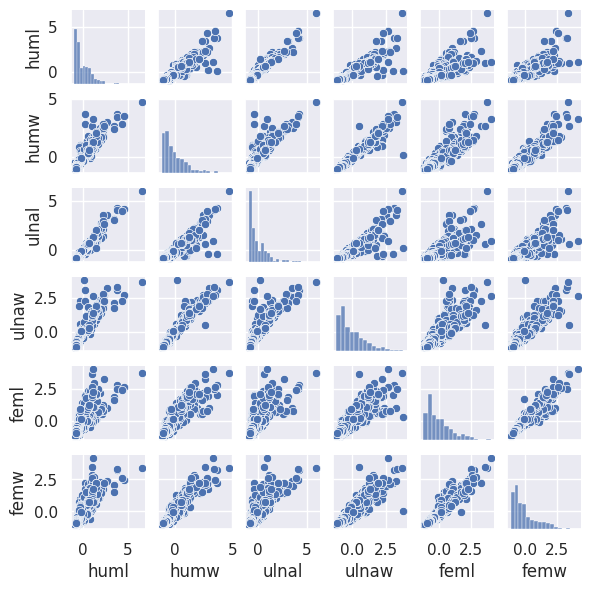

In [40]:
plt.figure()
sns.set(context='notebook',style='darkgrid', palette='deep',font='sans-serif', font_scale=1)
pairplot= sns.pairplot(data=X,height=1) 

**Principal Component Analysis (PCA)**

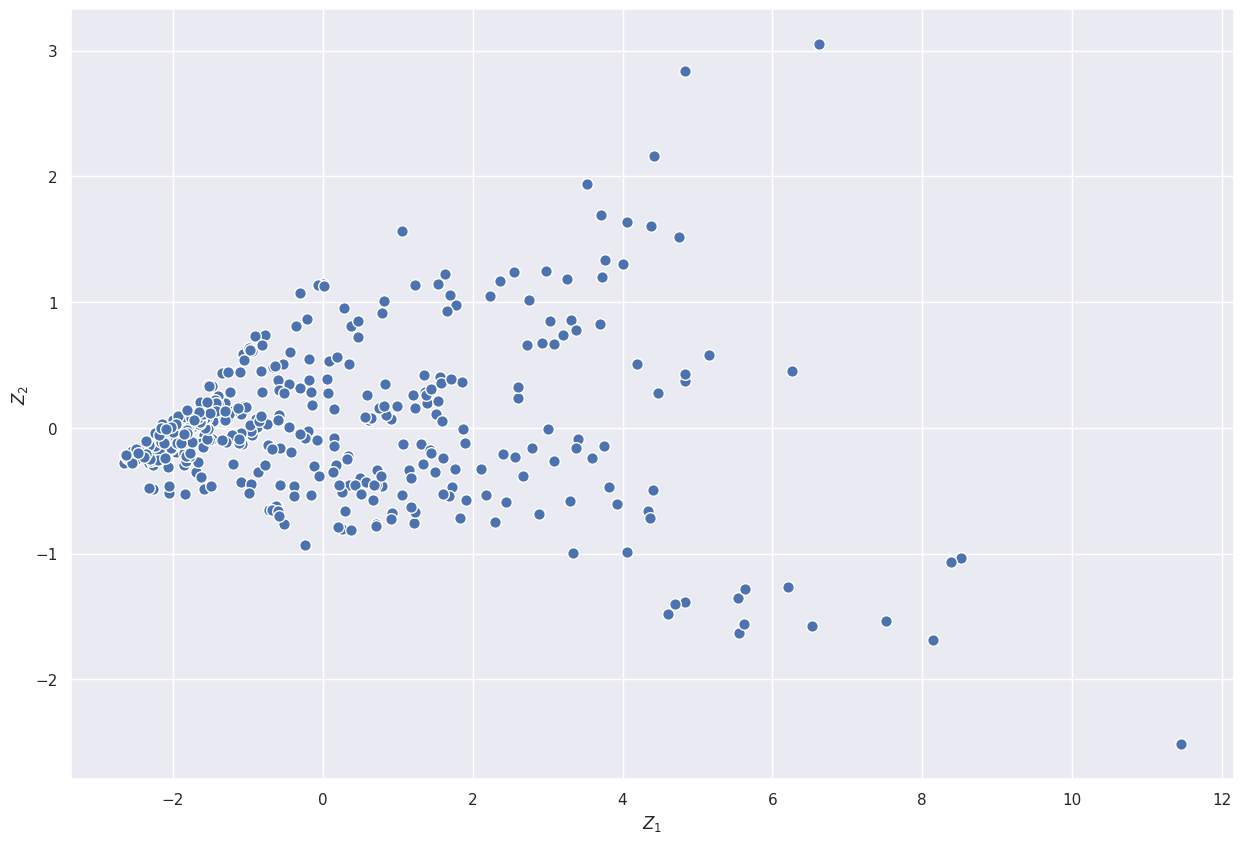

In [41]:
pca = PCA()
Z = pca.fit_transform(X)
plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.scatter(Z[:,0], Z[:,1], s=70,edgecolors='white')

**Eigenvectors**

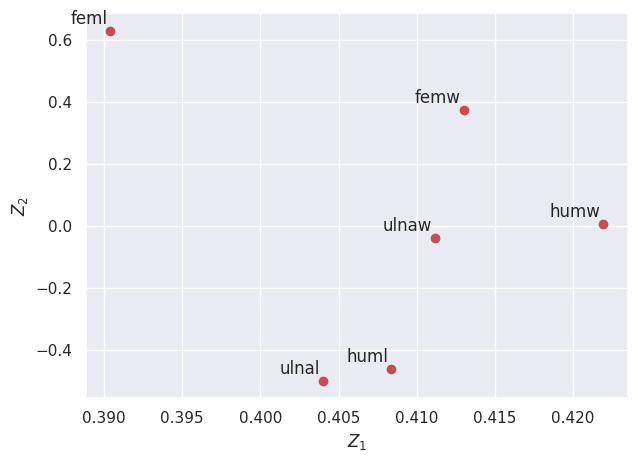

In [42]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
     

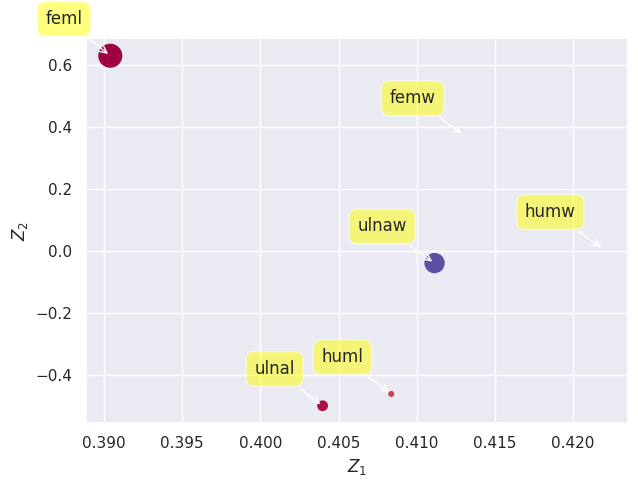

In [43]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([5.4186408 , 0.36012134, 0.14039664, 0.04187696, 0.03097196,
       0.02255541])

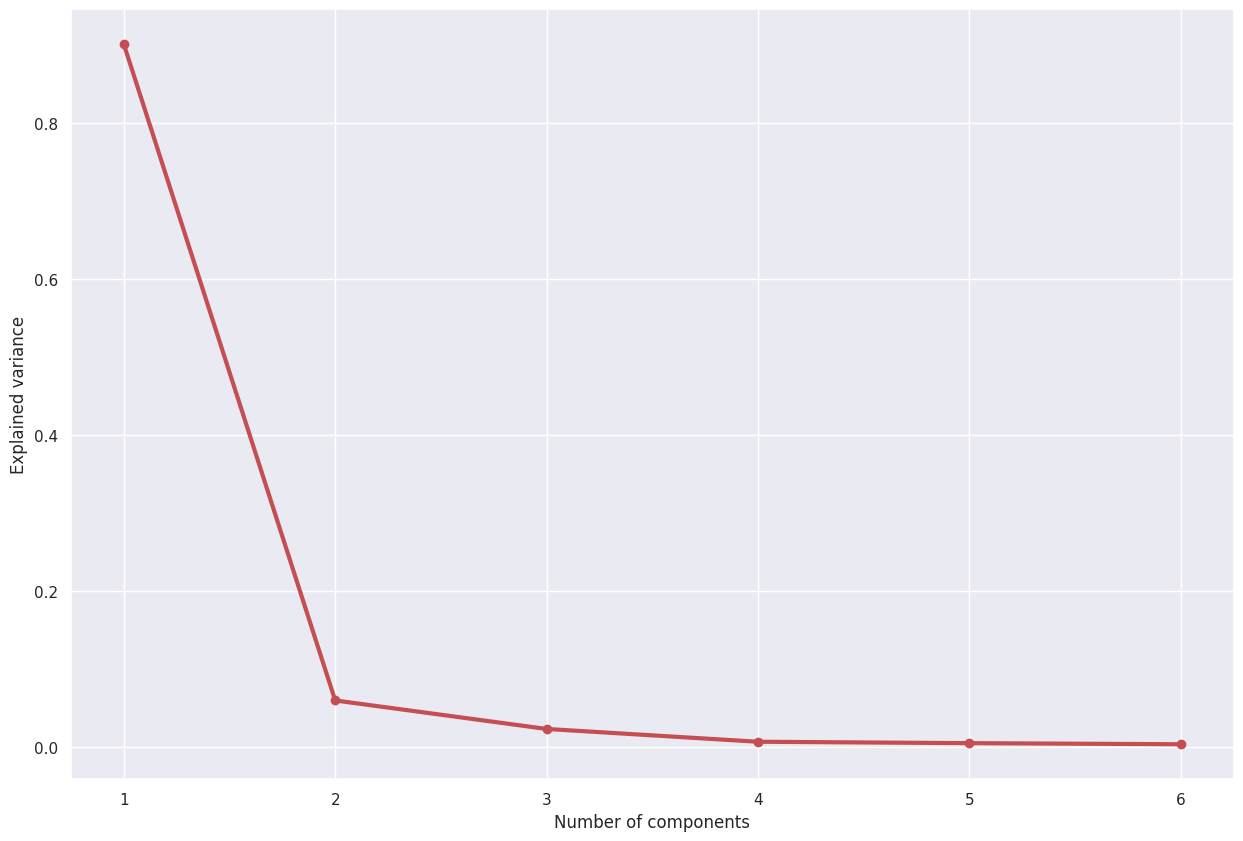

In [44]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

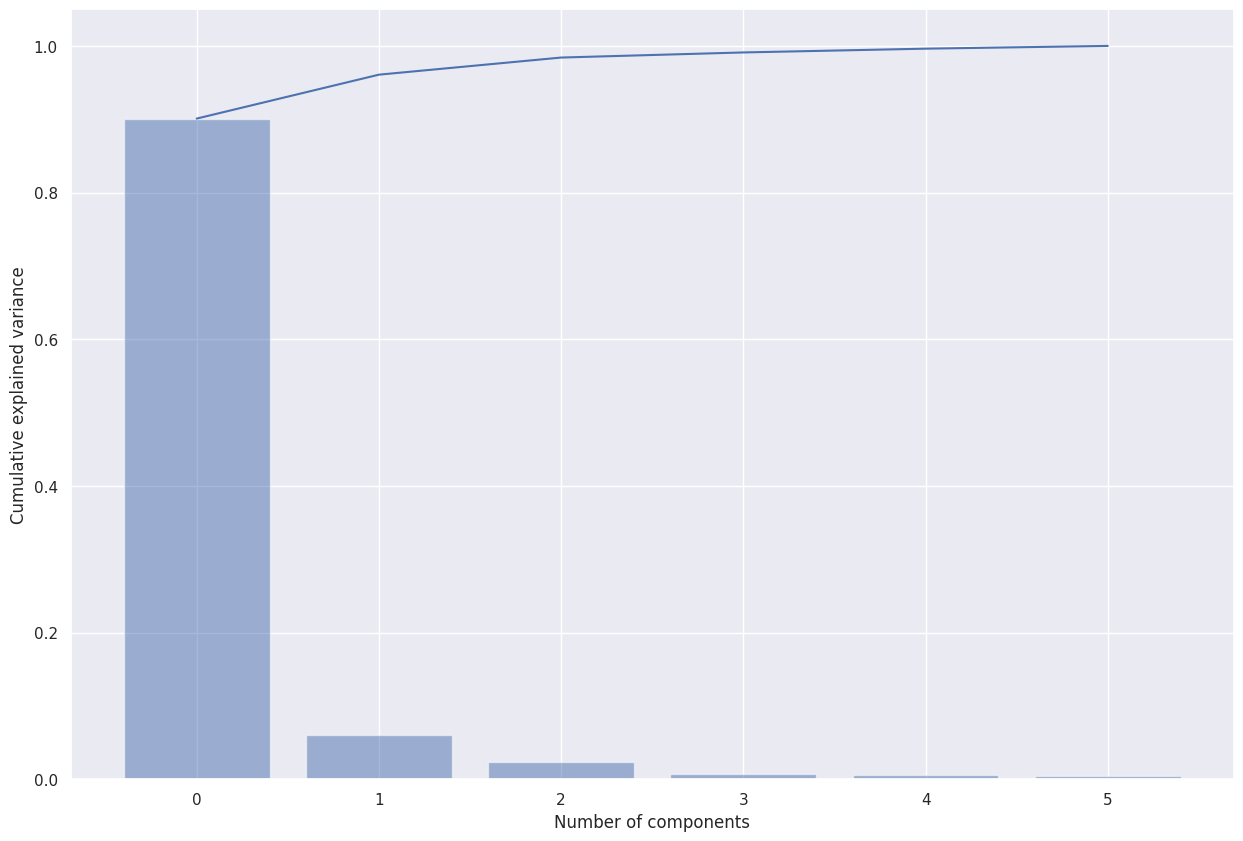

In [45]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

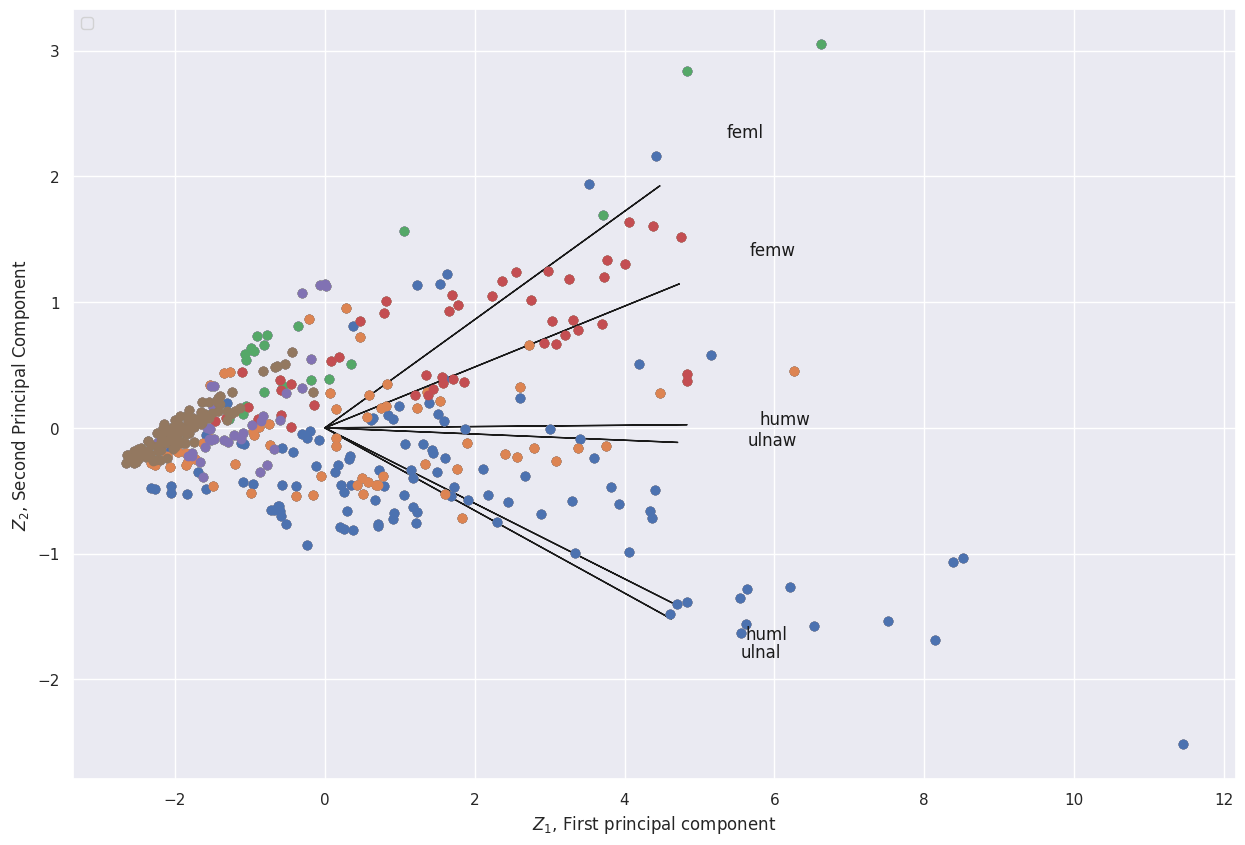

In [46]:

# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]
fig, ax = plt.subplots(figsize=(15,10))

plt.xlabel('$Z_1$, First principal component')
plt.ylabel('$Z_2$, Second Principal Component')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
  for i in df['type'].unique():
    ax.scatter(Z1[df['type']==i], Z2[df['type']==i])
legend = ax.legend(shadow=False, ncol=3, bbox_to_anchor=(0.7, -0.1),loc='upper right')

plt.legend(loc='upper left')
plt.show()


Text(0.5, 1.0, 'PCA Covariance Matrix')

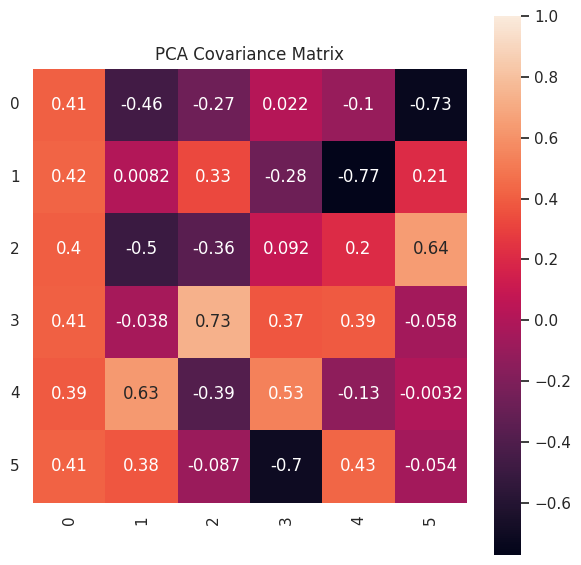

In [47]:
comps = pd.DataFrame(A)
plt.figure(figsize=(7,7))
ax=sns.heatmap(comps,vmax=1, square=True,annot=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=True,labeltop=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('PCA Covariance Matrix')

**Using PCA Library**

In [48]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [50]:
out['PC']

PC1       PC2
0    0.914135  0.072385
1    1.385645  0.196064
2    0.984211  0.171899
3    0.610614  0.061409
4   -0.201251 -0.022784
..        ...       ...
408 -2.238420 -0.044531
409 -2.188181 -0.059500
410 -2.162006  0.002105
411 -2.097052 -0.011672
412 -2.365612 -0.101235

[413 rows x 2 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '2 Principal Components explain [98.41%] of the variance'}, xlabel='PC1 (90.0% expl.var)', ylabel='PC2 (5.98% expl.var)'>)

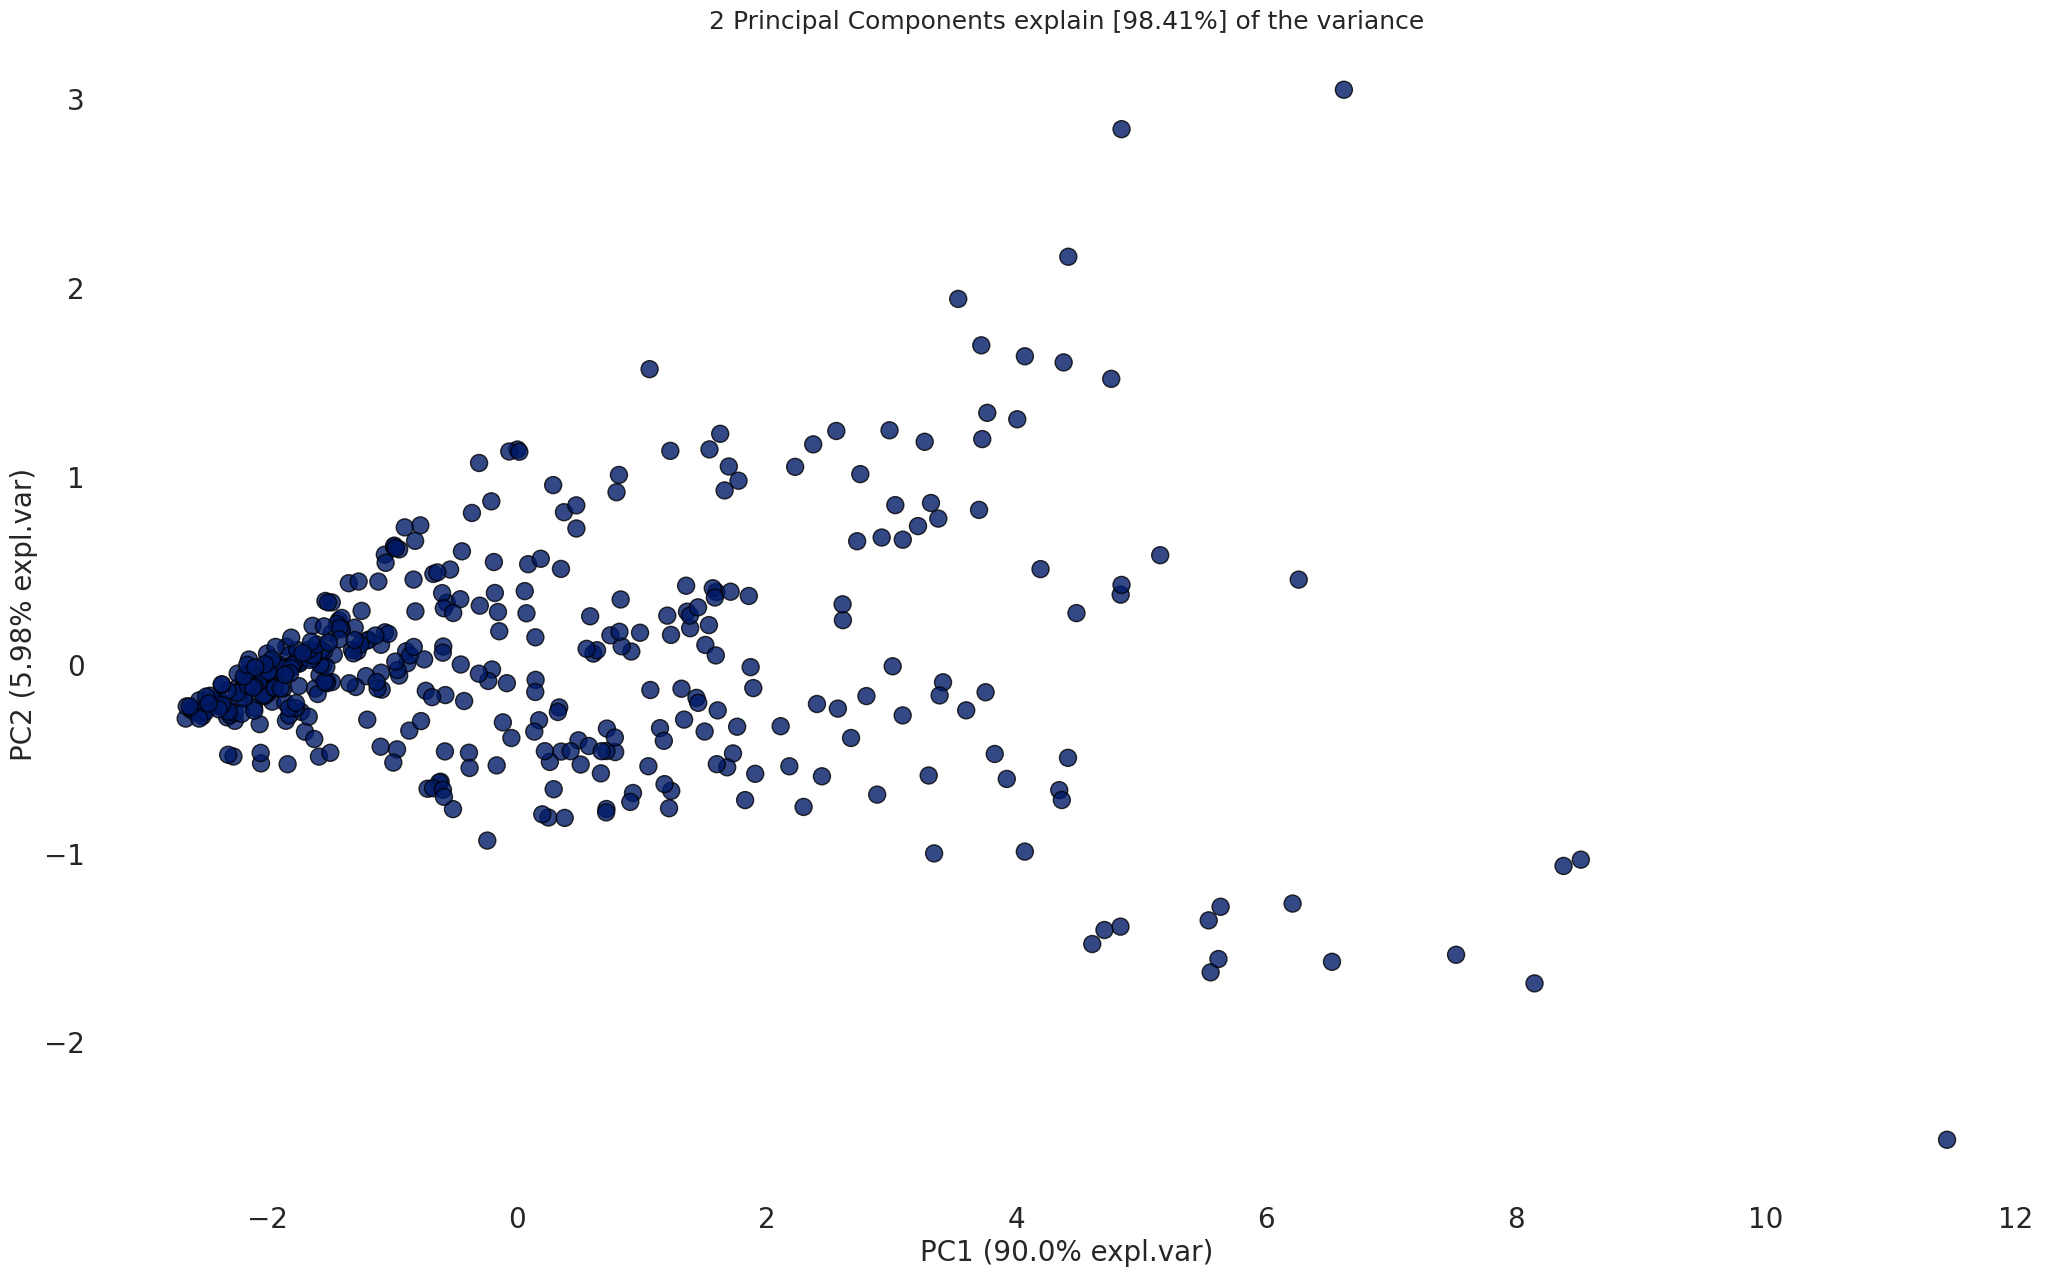

In [51]:
model.scatter(label=True, legend=False)


**Eigenvectors**

In [52]:
A = out['loadings'].T
A

PC1       PC2
huml   0.408366 -0.460052
humw   0.421941  0.008210
ulnal  0.403976 -0.498120
ulnaw  0.411137 -0.037914
feml   0.390395  0.630853
femw   0.412994  0.375164

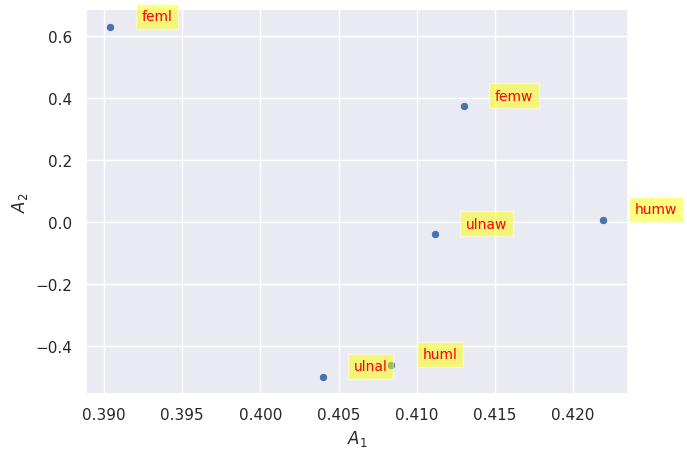

In [62]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.002,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

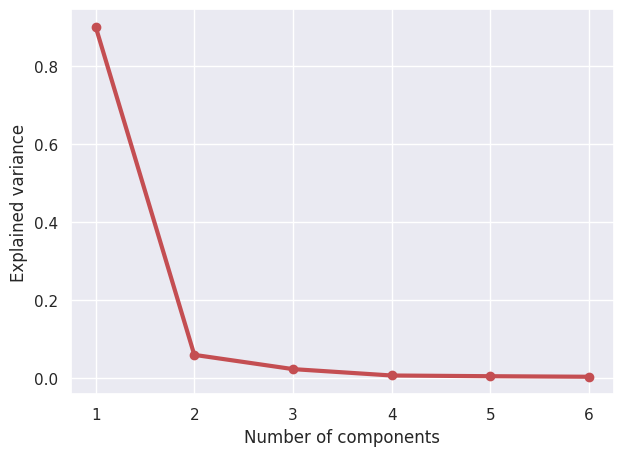

In [63]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

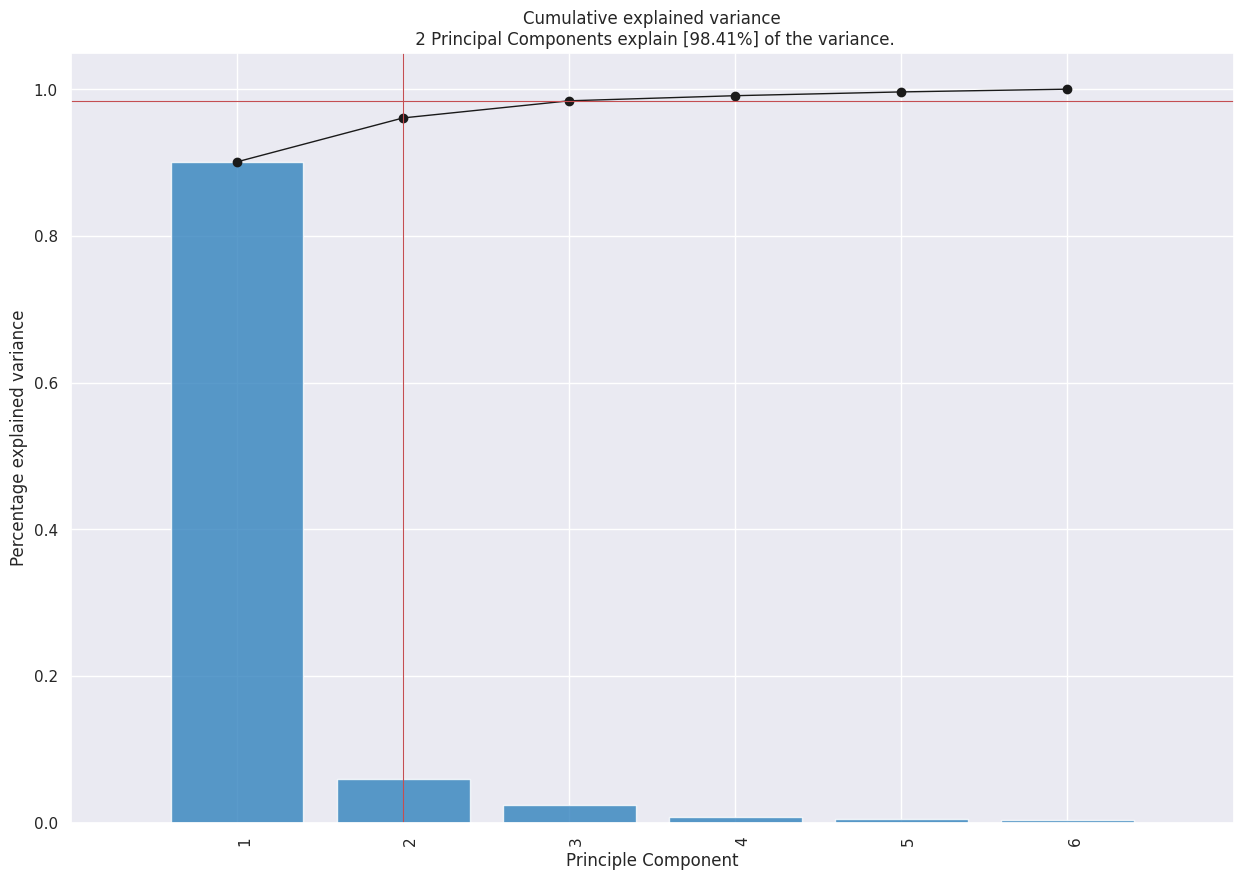

<Figure size 700x500 with 0 Axes>

In [64]:
model.plot();


**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


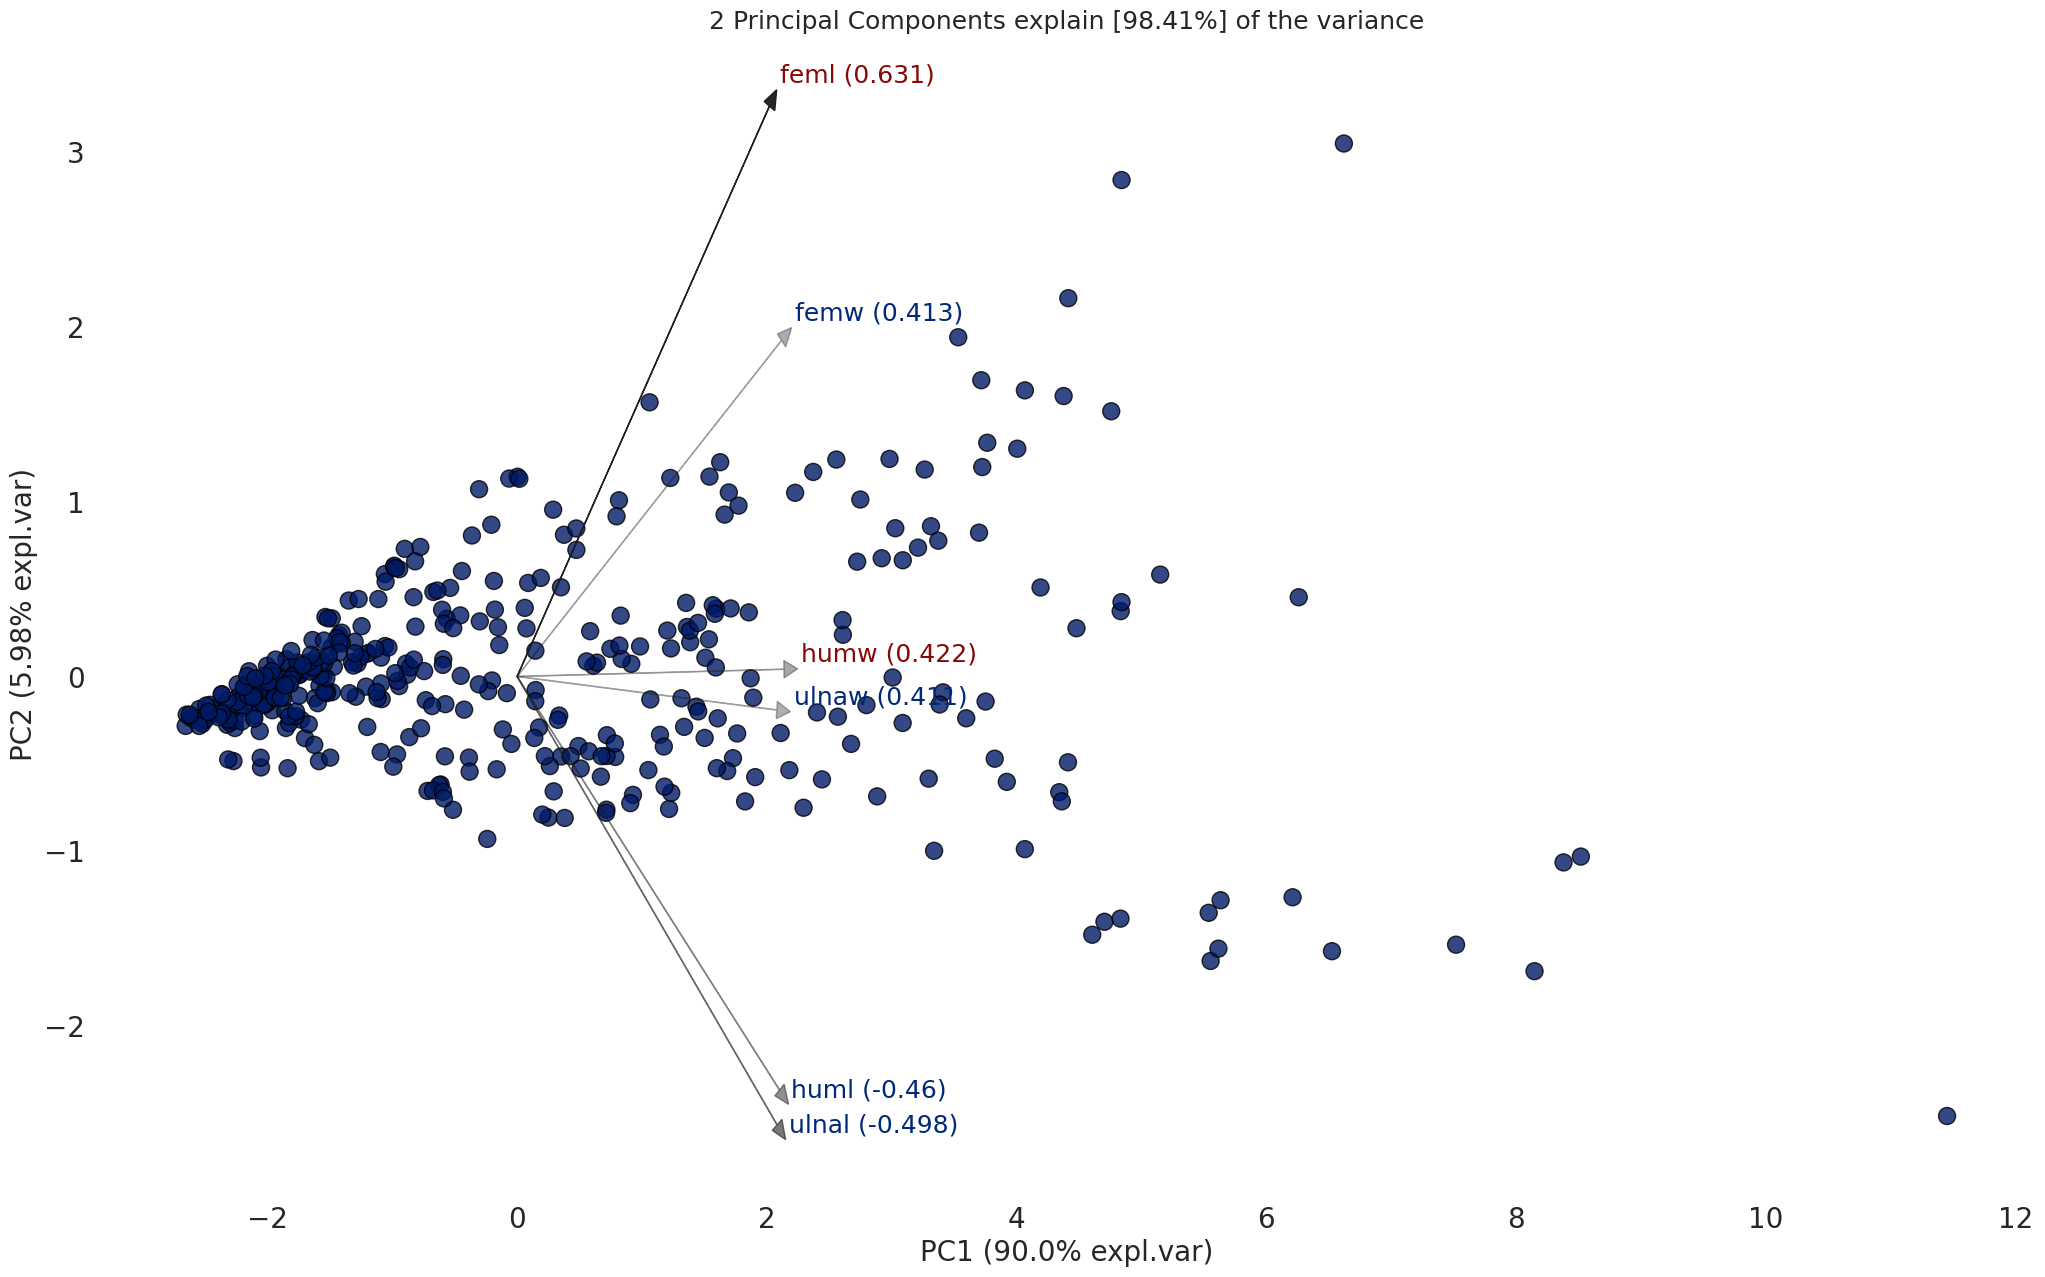

(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '2 Principal Components explain [98.41%] of the variance'}, xlabel='PC1 (90.0% expl.var)', ylabel='PC2 (5.98% expl.var)'>)

In [65]:
model.biplot(label=False, legend=False, color_arrow='k')

**Classification using Pycaret**

In [66]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [67]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

ImportError: ignored

In [69]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (372, 7)
Unseen Data For Predictions: (41, 7)


In [70]:
from pycaret.classification import *

In [71]:
clf = setup(data=data, target='type', train_size=0.7, session_id=1368)

**Comparing All Models**

In [72]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [73]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Create a Model

**Logistic Regresssion**

In [74]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [75]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [76]:
tuned_lr

LogisticRegression(C=2.069, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

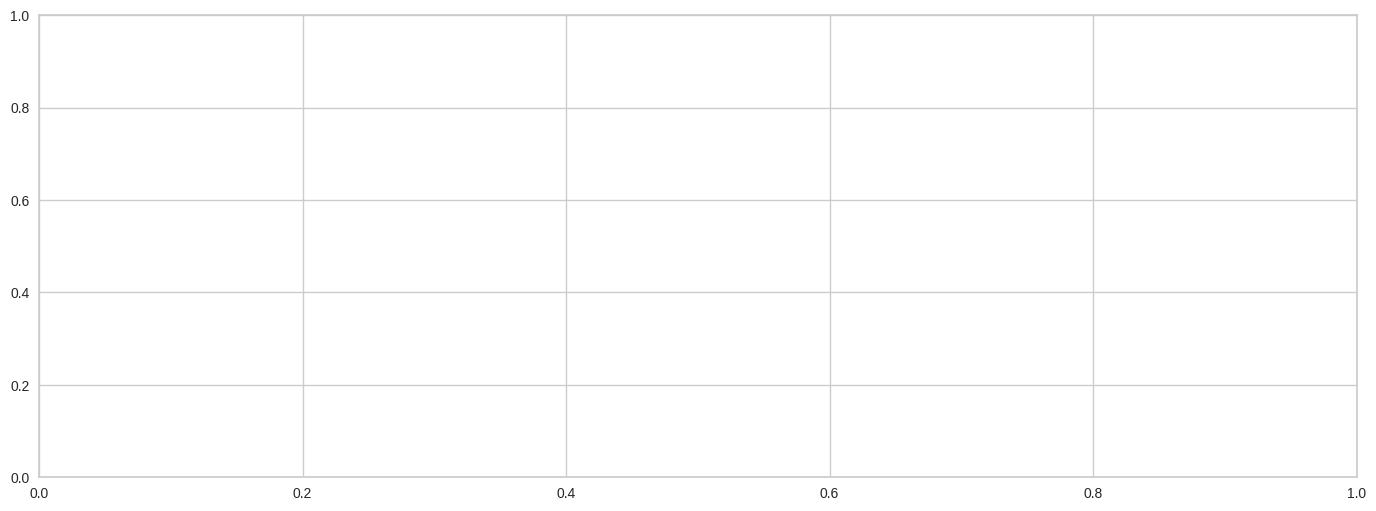

In [77]:
evaluate_model(tuned_lr)

In [78]:
ET = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [79]:
tuned_Et = tune_model(ET)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

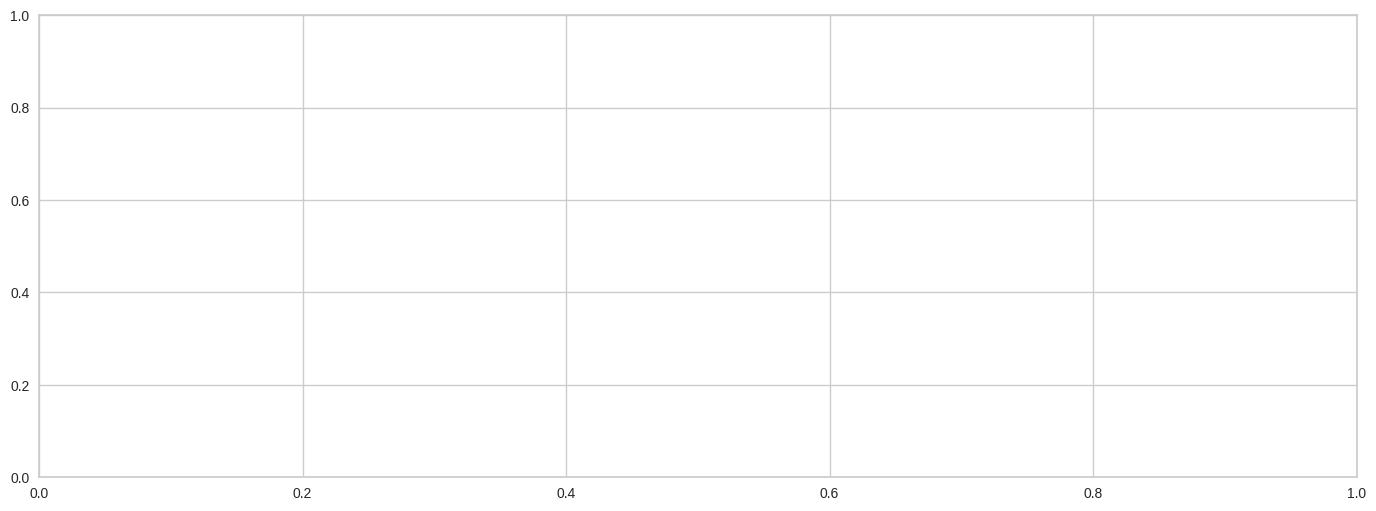

In [80]:
evaluate_model(tuned_Et)

In [81]:
Qda = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
tuned_Qda = tune_model(Qda) 

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

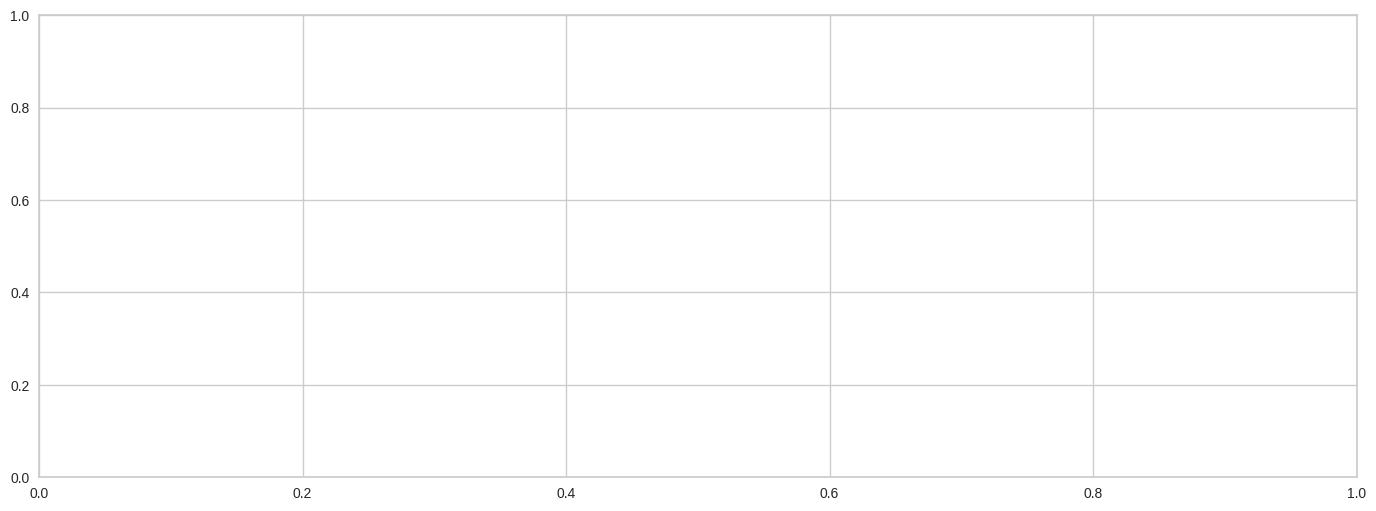

In [83]:
evaluate_model(tuned_Qda)

**Classification + PCA**

In [84]:
clf_pca = setup(data=data, target='type', train_size=0.7, session_id=1368, normalize = True, pca = True, pca_components = 2)

In [85]:
best_model_pca = compare_models()


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [86]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1368, verbose=0, warm_start=False)

In [87]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [88]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [89]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1368, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

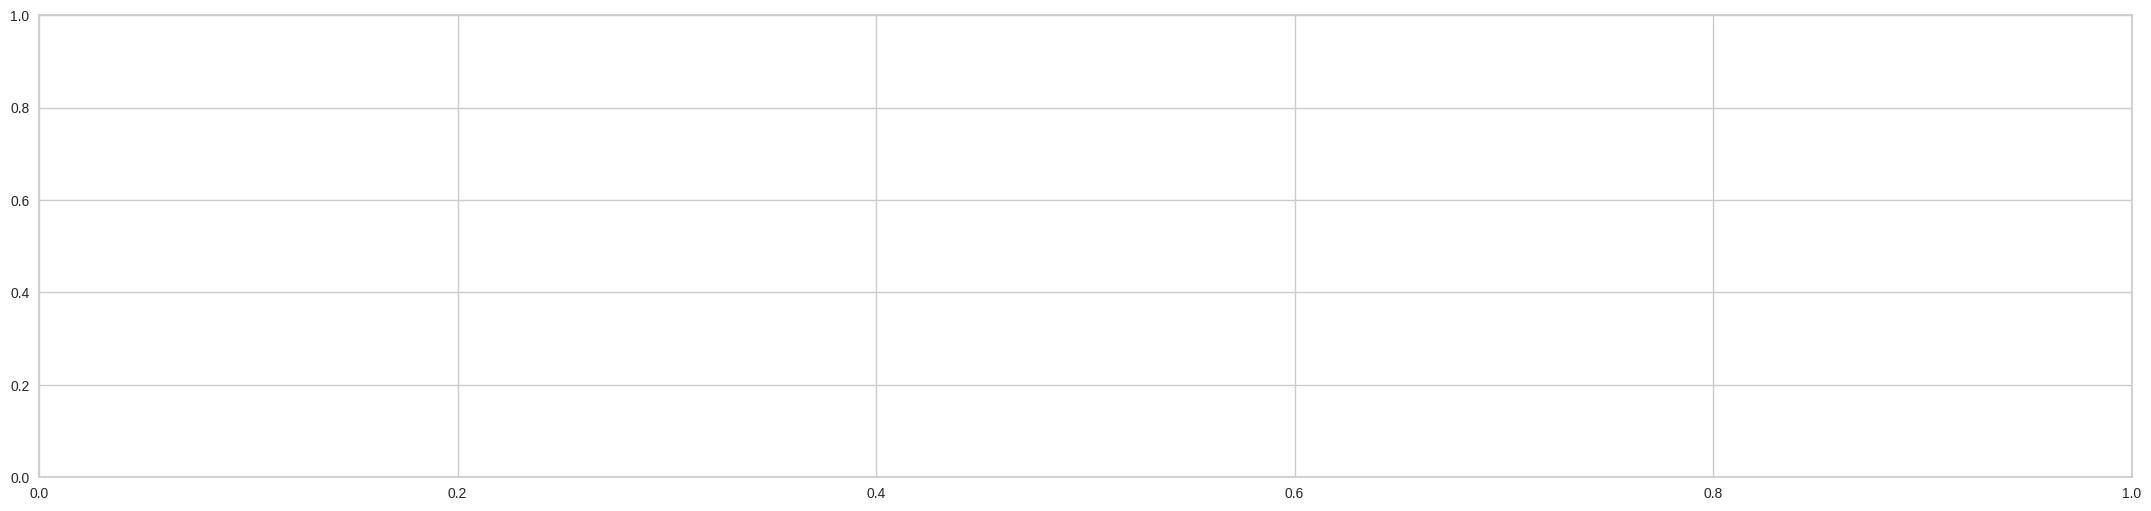

In [90]:
evaluate_model(tuned_best_model_pca)

In [91]:
Et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [92]:
tuned_Et = tune_model(Et)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

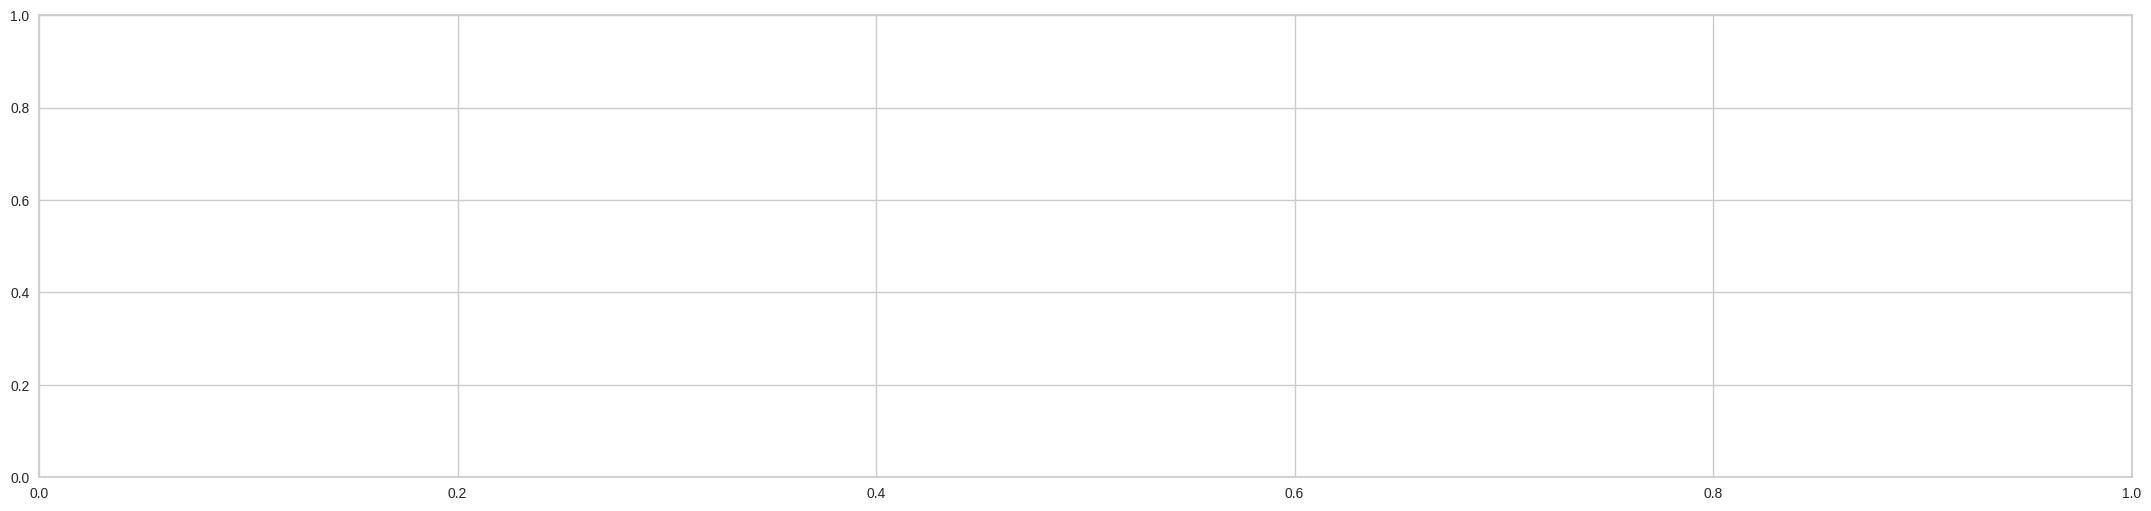

In [93]:
evaluate_model(tuned_Et)

In [94]:
Dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [95]:
tuned_Dt = tune_model(Dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

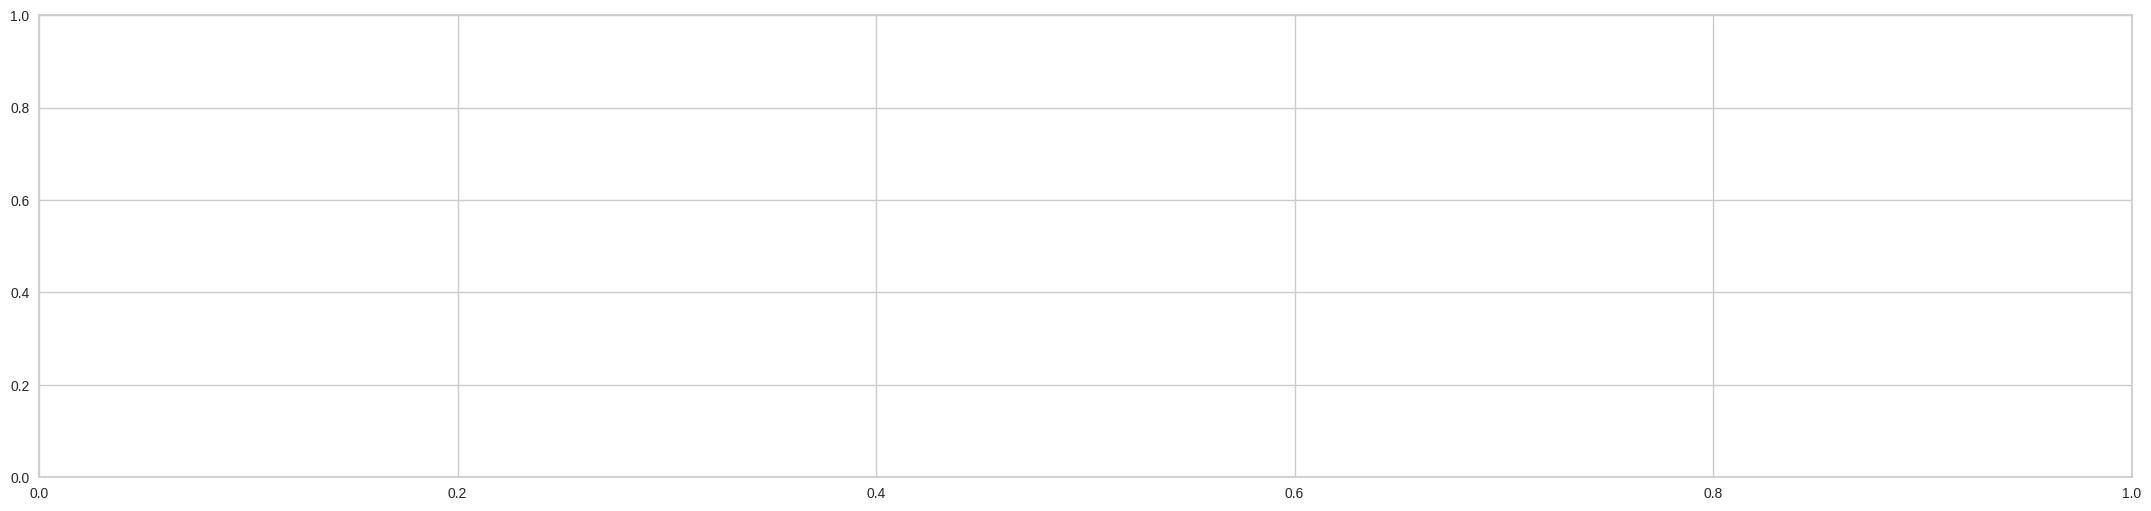

In [96]:
evaluate_model(tuned_Dt)

**Explainable AI with Shapley values**

In [97]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import shap

In [99]:
Et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [100]:
tuned_et_pca = tune_model(Et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot**

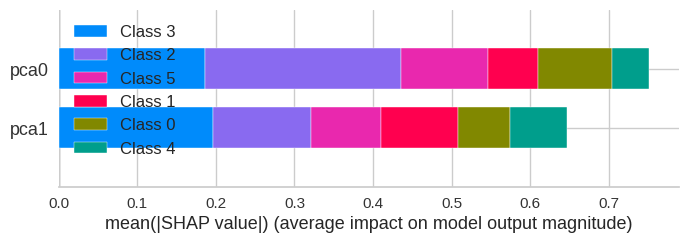

In [101]:
interpret_model(tuned_et_pca, plot='summary')

**Visualize a single prediction**

In [102]:
interpret_model(tuned_et_pca, plot='reason', observation=35)

**Visualize many predictions**

In [103]:
interpret_model(tuned_et_pca, plot='reason')